## Chapter8.3 畳み込み演算の種類とプーリング層

In [1]:
# パッケージの読み込み
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# MNISTデータセットの読み込み
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./mnist/")

Extracting ./mnist/train-images-idx3-ubyte.gz
Extracting ./mnist/train-labels-idx1-ubyte.gz
Extracting ./mnist/t10k-images-idx3-ubyte.gz
Extracting ./mnist/t10k-labels-idx1-ubyte.gz


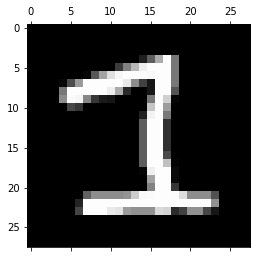

In [3]:
# ラベル1の入力画像
img_in = mnist.test.images[3906]

plt.gray()
plt.matshow(img_in.reshape(28, 28))

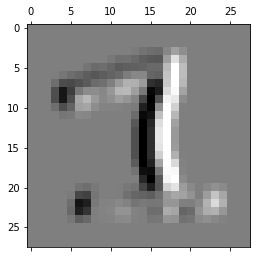

In [4]:
with tf.Graph().as_default():
    x = tf.placeholder(tf.float32, shape=[784])
    x_image = tf.reshape(x, shape=[-1, 28, 28, 1])  # バッチ数、高さ、幅、チャネル数

    # フィルタとしての重みを定義
    # shapeは[高さ、幅、入力チャネル数、出力チャネル数]
    w = tf.constant([[1, 0, -1],
                     [2, 0, -2],
                     [1, 0, -1]], dtype=tf.float32, shape=[3, 3, 1, 1])
    # 畳み込み層
    # stridesは[バッチ、高さ、幅、チャネル]方向の歩幅
    conv = tf.nn.conv2d(x_image, w, strides=[1, 1, 1, 1], padding='SAME')

    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        result = sess.run(conv, feed_dict={x: img_in})

# 畳み込み層の出力を可視化
plt.matshow(result.reshape(28, 28))

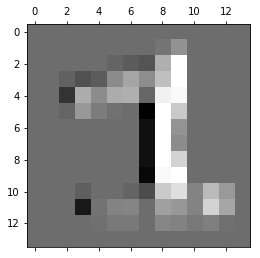

In [5]:
with tf.Graph().as_default():
    x = tf.placeholder(tf.float32, shape=[784])
    x_image = tf.reshape(x, shape=[-1, 28, 28, 1])  # バッチ数、高さ、幅、チャネル数

    # フィルタとしての重みを定義
    # shapeは[高さ、幅、入力チャネル数、出力チャネル数]
    w = tf.constant([[1, 0, -1],
                     [2, 0, -2],
                     [1, 0, -1]], dtype=tf.float32, shape=[3, 3, 1, 1])
    # 畳み込み層
    # stridesは[バッチ、高さ、幅、チャネル]方向の歩幅
    conv = tf.nn.conv2d(x_image, w, strides=[1, 1, 1, 1], padding='SAME')

    # プーリング層
    pool = tf.nn.max_pool(conv, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1],
                          padding='SAME')
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        result = sess.run(pool, feed_dict={x: img_in})

# 畳み込み層の出力を可視化
plt.matshow(result.reshape(14, 14))